[Chapter 2] Acquiring and Processing Time Series Data

In [66]:
import pandas as pd
import numpy as np
from src.utils import compact_to_expanded # convert from compact-form ts to expanded-form ts

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import missingno as msno   # visualize ts data

prepare data

In [3]:
# read data (skip first row cause it doesn't have any data)
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx", skiprows=1)
df.head()
# equity index price

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [4]:
# convert date columns into pd.timestamp/datetimeindex
print(pd.to_datetime("13-4-1987").strftime("%d, %B %Y"))
print(pd.to_datetime("4-1-1987").strftime("%d, %B %Y"))
print(pd.to_datetime("4-1-1987", dayfirst=True).strftime("%d, %B %Y"))
print(pd.to_datetime("4|1|1987", format="%d|%m|%Y").strftime("%d, %B %Y"))

13, April 1987
01, April 1987
04, January 1987
04, January 1987


C:\Users\user\AppData\Local\Temp\ipykernel_2356\3016842093.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  print(pd.to_datetime("13-4-1987").strftime("%d, %B %Y"))


In [5]:
# convert date column in df
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.date.min(), df.date.max()

(Timestamp('2009-01-05 00:00:00'), Timestamp('2011-02-22 00:00:00'))

In [6]:
# access datetime properties (".dt" accessor)
print(f"""
Date: {df.date.iloc[0]}
Day of year: {df.date.dt.day_of_year.iloc[0]}
Day of week: {df.date.dt.dayofweek.iloc[0]} 
Month: {df.date.dt.month.iloc[0]}
Month Name: {df.date.dt.month_name().iloc[0]}
Quarter: {df.date.dt.quarter.iloc[0]}
Year: {df.date.dt.year.iloc[0]}
ISO Week: {df.date.dt.isocalendar().week.iloc[0]}    
""")

# monday <=> day of week = 0


Date: 2009-01-05 00:00:00
Day of year: 5
Day of week: 0 
Month: 1
Month Name: January
Quarter: 1
Year: 2009
ISO Week: 2    



In [7]:
# setting the index as the datetime column
df.set_index('date', inplace=True)

In [8]:
# select all data after 2010-01-04 (inclusive)
df['2010-01-04':]

# select all data between 2010-01-04 (inclusive) and 2010-02-06 (exclusive)
df['2010-01-04':'2010-02-06']

# select data 2010 and before (including 2010-12-31 and before)
df[:"2010"]

# select data between 2010-01 and 2010-06 (from 2010-01-04 to 2010-06-30, both inclusive)
df['2010-01':'2010-06']

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2010-01-04,0.010229,0.014478,0.015916,0.000000,0.016018,0.000000,0.000000,0.016778,0.008399
2010-01-05,0.013898,0.024019,0.003111,-0.002722,0.004028,0.002535,0.002780,0.001316,0.008067
2010-01-06,0.007957,0.005706,0.000545,0.000409,0.001357,0.004635,0.006938,0.000586,0.005330
2010-01-07,0.007772,0.007498,0.003993,-0.002484,-0.000597,-0.004650,-0.003938,-0.000360,-0.006375
2010-01-08,-0.003189,0.000835,0.002878,0.003027,0.001356,0.010862,-0.002672,0.003554,0.001229
...,...,...,...,...,...,...,...,...,...
2010-06-24,0.000166,-0.008024,-0.016946,-0.014455,-0.015236,0.000467,-0.018948,-0.017801,-0.006717
2010-06-25,-0.000920,-0.003591,0.002855,-0.007366,-0.010585,-0.019411,0.013778,-0.007954,-0.002311
2010-06-28,0.010132,0.016951,-0.002036,0.014168,0.004981,-0.004481,-0.009283,0.009125,0.000540


In [9]:
# specify start and end dates with frequency
print(pd.date_range(start='2018-01-20', end='2018-01-23', freq='D').astype(str).tolist())

# specify start and number of periods to generate in te given frequency
print(pd.date_range(start='2018-01-20', periods=4, freq='D').astype(str).tolist())

# generate a date sequence with every 2 days
print(pd.date_range(start='2018-01-20', periods=4, freq='2D').astype(str).tolist())

# generate a date sequence every month. it starts with month end by default
print(pd.date_range(start='2018-01-20', periods=4, freq='M').astype(str).tolist())

# generate a date sequence every month, but with month start
print(pd.date_range(start='2018-01-20', periods=4, freq='MS').astype(str).tolist())

['2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23']
['2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23']
['2018-01-20', '2018-01-22', '2018-01-24', '2018-01-26']
['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30']
['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']


In [10]:
# use pd.TimeDelta
# add 4 days to the date range
print((pd.date_range(start='2018-01-20', end='2018-01-23', freq='D') + pd.Timedelta(4, unit='D')).astype(str).tolist())

# add 4 weeks to the date range
print((pd.date_range(start='2018-01-20', end='2018-01-23', freq='D') + pd.Timedelta(4, unit='W')).astype(str).tolist())

['2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27']
['2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20']


handle the missing data

In [11]:
# read data
from sodapy import Socrata

client = Socrata("www.data.act.gov.au", None)
results = client.get("94a5-zqnn", limit=10000)
data = pd.DataFrame.from_records(results)
data.head(3)

,name,gps,datetime,no2,o3_1hr,o3_4hr,o3_8hr,co,pm10_1_hr,pm2_5_1_hr,...,aqi_co,aqi_no2,aqi_o3_1hr,aqi_o3_4hr,aqi_o3_8hr,aqi_pm10,aqi_pm2_5,aqi_site,date,time
0,Monash,"{'latitude': '-35.418302', 'longitude': '149.0...",2025-07-29T18:00:00.000,0.005,0.022,0.027,0.031,0.22,5.37,4.02,...,2,4,22,34,48,7,11,34,2025-07-29T00:00:00.000,18:00:00
1,Civic,"{'latitude': '-35.285307', 'longitude': '149.1...",2025-07-29T18:00:00.000,NaN,0.011,0.015,0.019,0,12.79,3.24,...,0,0,11,19,29,12,5,19,2025-07-29T00:00:00.000,18:00:00
2,Florey,"{'latitude': '-35.220606', 'longitude': '149.0...",2025-07-29T18:00:00.000,0.01,0.014,0.022,0.026,0.05,7.73,2.5,...,0,9,14,28,40,8,9,28,2025-07-29T00:00:00.000,18:00:00


In [12]:
# adjust data type and slice data
data['name'] = data['name'].astype('string')
data['date'] = pd.to_datetime(data['date'], yearfirst=True) # for filtering
data['pm2_5_1_hr'] = pd.to_numeric(data['pm2_5_1_hr'], errors='coerce') # convert datatype to numeric and keep NaN
data = data[data.name=='Monash'][['datetime','date','time','pm2_5_1_hr']]

,datetime,date,time,pm2_5_1_hr
0,2025-05-15T00:00:00.000,2025-05-15,00:00,15.8
1,2025-05-15T01:00:00.000,2025-05-15,01:00,13.3
2,2025-05-15T02:00:00.000,2025-05-15,02:00,10.9
3,2025-05-15T03:00:00.000,2025-05-15,03:00,8.7
4,2025-05-15T04:00:00.000,2025-05-15,04:00,6.7


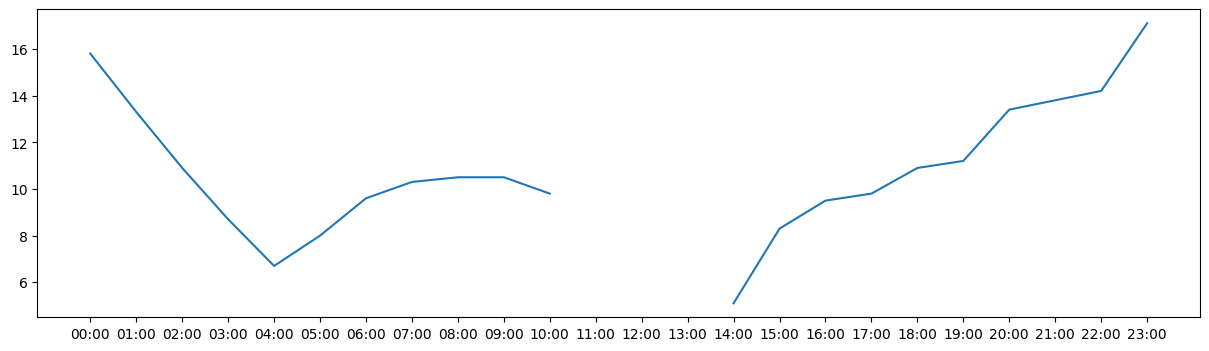

In [13]:
# original
df = data[data.date=='2025-05-15'].sort_values(by='time', ascending=True)
df = df.reset_index(drop=True)  # necessary for later interpolation
plt.figure(figsize=(15, 4))
plt.plot(df['time'], df['pm2_5_1_hr'])
df.head()

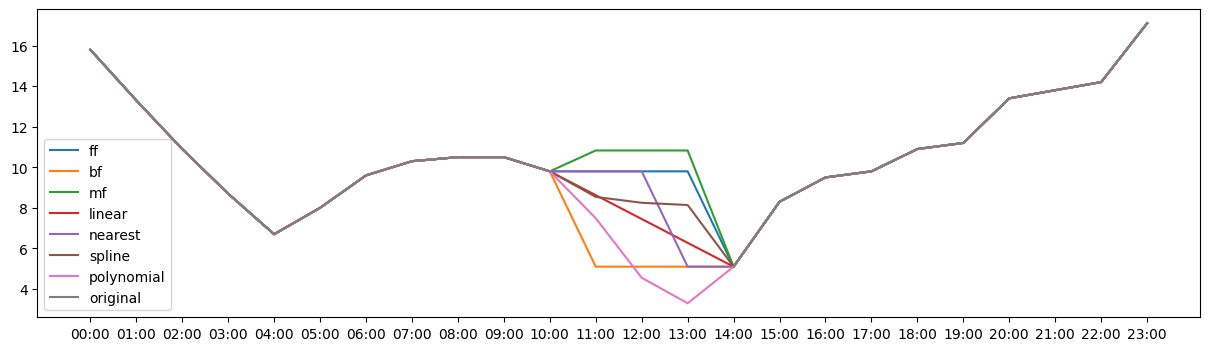

In [14]:
# fill in the missing values

# forward fill (last observation carried forward)
df['pm2_5_1_hr_ff'] = df['pm2_5_1_hr'].ffill()

# backward fill (next observation and backtrack to fill in)
df['pm2_5_1_hr_bf'] = df['pm2_5_1_hr'].bfill()

# mean value fill (calculate the mean value of the entire series and whereever missing fill it with mean values)
df['pm2_5_1_hr_mf'] = df['pm2_5_1_hr'].fillna(df['pm2_5_1_hr'].mean())

# linear interpolation (draw a line between two observed points)
df['pm2_5_1_hr_li'] = df['pm2_5_1_hr'].interpolate(method='linear')

# nearest interpolation (fill in with closest observed value, combination of forward fill and backward fill)
df['pm2_5_1_hr_ni'] = df['pm2_5_1_hr'].interpolate(method='nearest')

# non-linear interpolation (e.g. the higer the order, the more flexible the function to fit)
# spline
df['pm2_5_1_hr_spl'] = df['pm2_5_1_hr'].interpolate(method='spline', order=2)
# polynomial
df['pm2_5_1_hr_poly'] = df['pm2_5_1_hr'].interpolate(method='polynomial', order=5)

# visualization
plt.figure(figsize=(15, 4))
plt.plot(df['time'], df['pm2_5_1_hr_ff'], label='ff')
plt.plot(df['time'], df['pm2_5_1_hr_bf'], label='bf')
plt.plot(df['time'], df['pm2_5_1_hr_mf'], label='mf')
plt.plot(df['time'], df['pm2_5_1_hr_li'], label='linear')
plt.plot(df['time'], df['pm2_5_1_hr_ni'], label='nearest')
plt.plot(df['time'], df['pm2_5_1_hr_spl'], label='spline')
plt.plot(df['time'], df['pm2_5_1_hr_poly'], label='polynomial')
plt.plot(df['time'], df['pm2_5_1_hr'], label='original')
plt.legend()

handle longer period of missing data

In [ ]:
block_df = pd.read_parquet('./data/london_smart_meters/preprocessed/london_smart_meters_merged_block_0-7.parquet')

# compact-form: any particular time series occupies only a single row (in pd.df), taking up much less memory
#       id and metadata scalar value, time-varying features occpuy the columns with an array
#       two additional columns to extrapolate timestamp (start_datetime and frequency) => only works for regularly sampled time series

# expanded/long-form: the time series is expanded along the rows of pd.df (i.e. if n steps in time series, it occupies n rows)
#       id and metadata repeated, time-varying data expanded along the rows, timestamp (instead of start date and freq) as a column

# covert from compact to expanded form
exp_block_df = compact_to_expanded(block_df[block_df.file=='block_7'],
                # time series value
                timeseries_col = 'energy_consumption', 
                # metadata or static features: not vary with time
                static_cols=['frequency', 'series_length', 'stdorToU', 'Acorn', 'Acorn_grouped', "file"], 
                # time-varying features: varies with time (different value for different point in time)
                time_varying_cols=['holidays','visibility','windBearing','temperature','dewPoint',
                                   'pressure','apparentTemperature','windSpeed','precipType','icon','humidity','summary'],
                # timeseries identifier: unique id
                ts_identifier='LCLid'  
                )

  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
exp_block_df.head(3)

,timestamp,LCLid,energy_consumption,frequency,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,2012-01-01 00:00:00,MAC000050,0.175,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
1,2012-01-01 00:30:00,MAC000050,0.212,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
2,2012-01-01 01:00:00,MAC000050,0.313,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast


<Axes: >

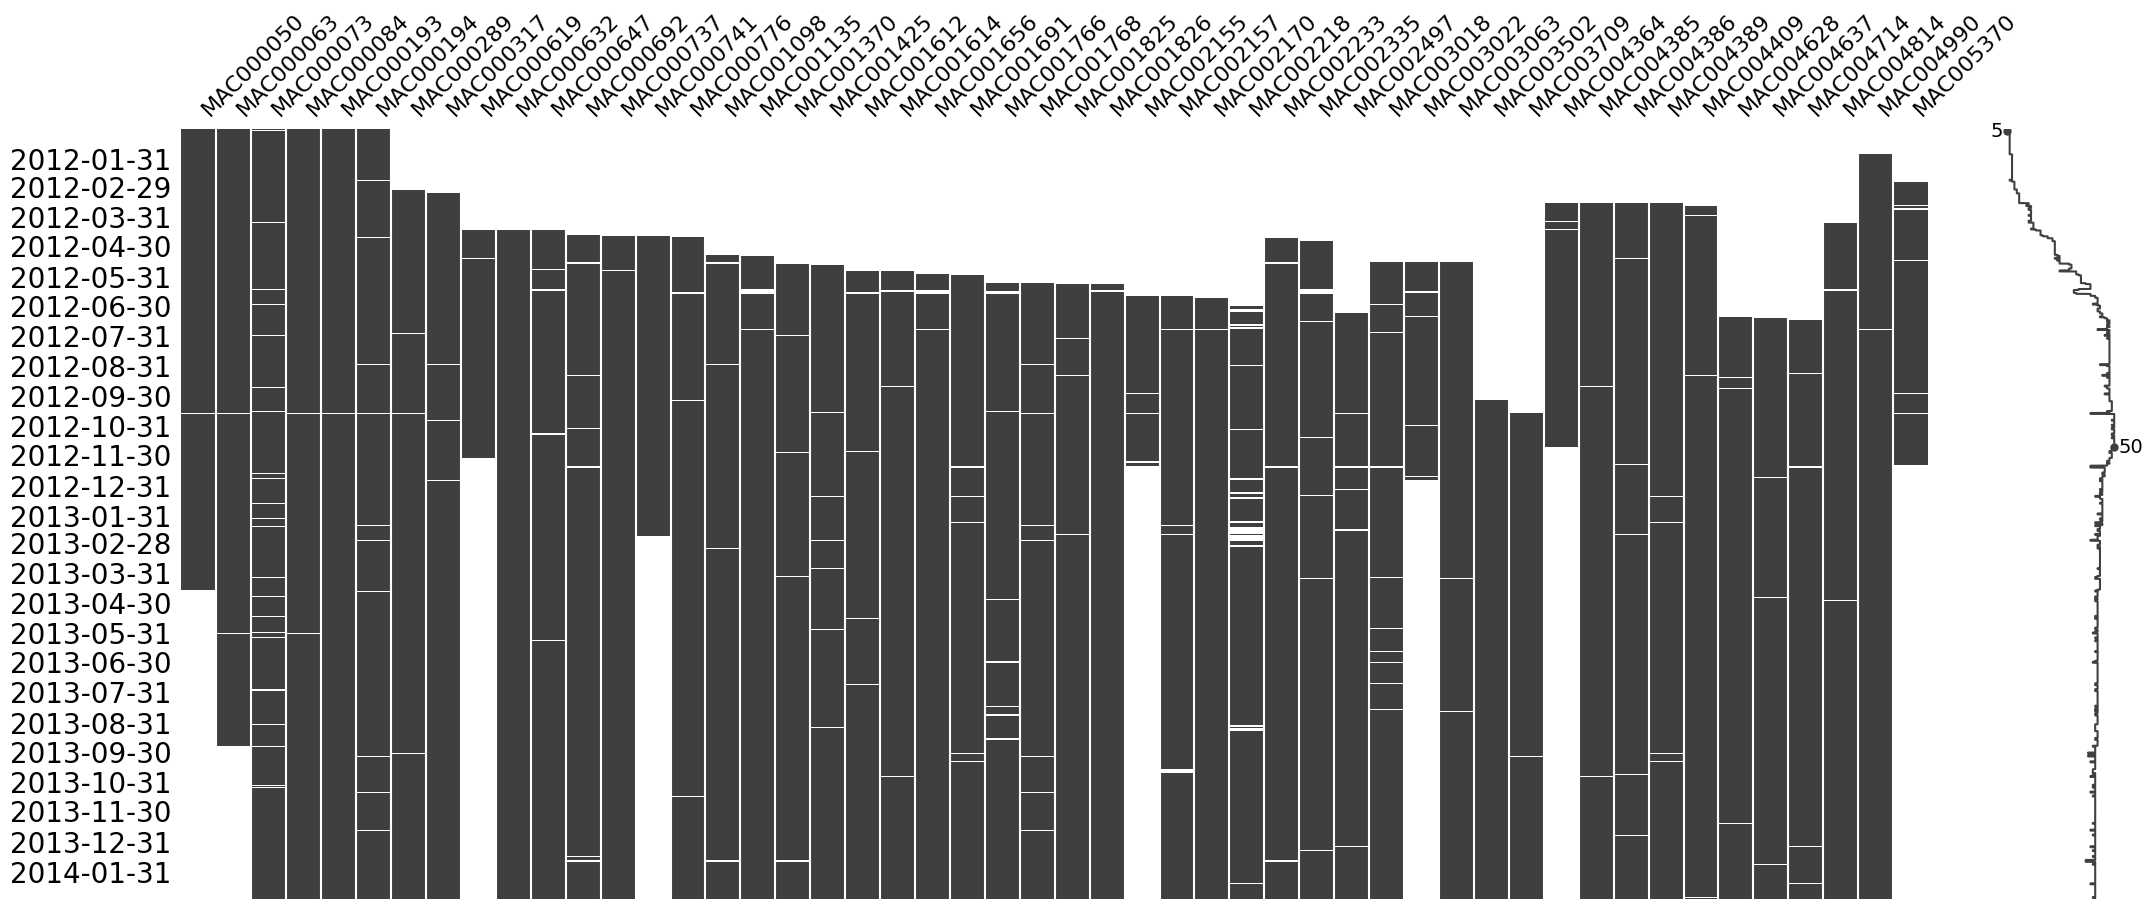

In [ ]:
# pivot the data to set index as the datetime and the different ts along the column
plot_df = pd.pivot_table(exp_block_df, index='timestamp', columns='LCLid', values='energy_consumption')

# plot
msno.matrix(plot_df, freq='M')

# big white gaps show that data collection for some consumers started later than the others, for some finish earlier than the rest.
# white lines are real missing values

<Axes: >

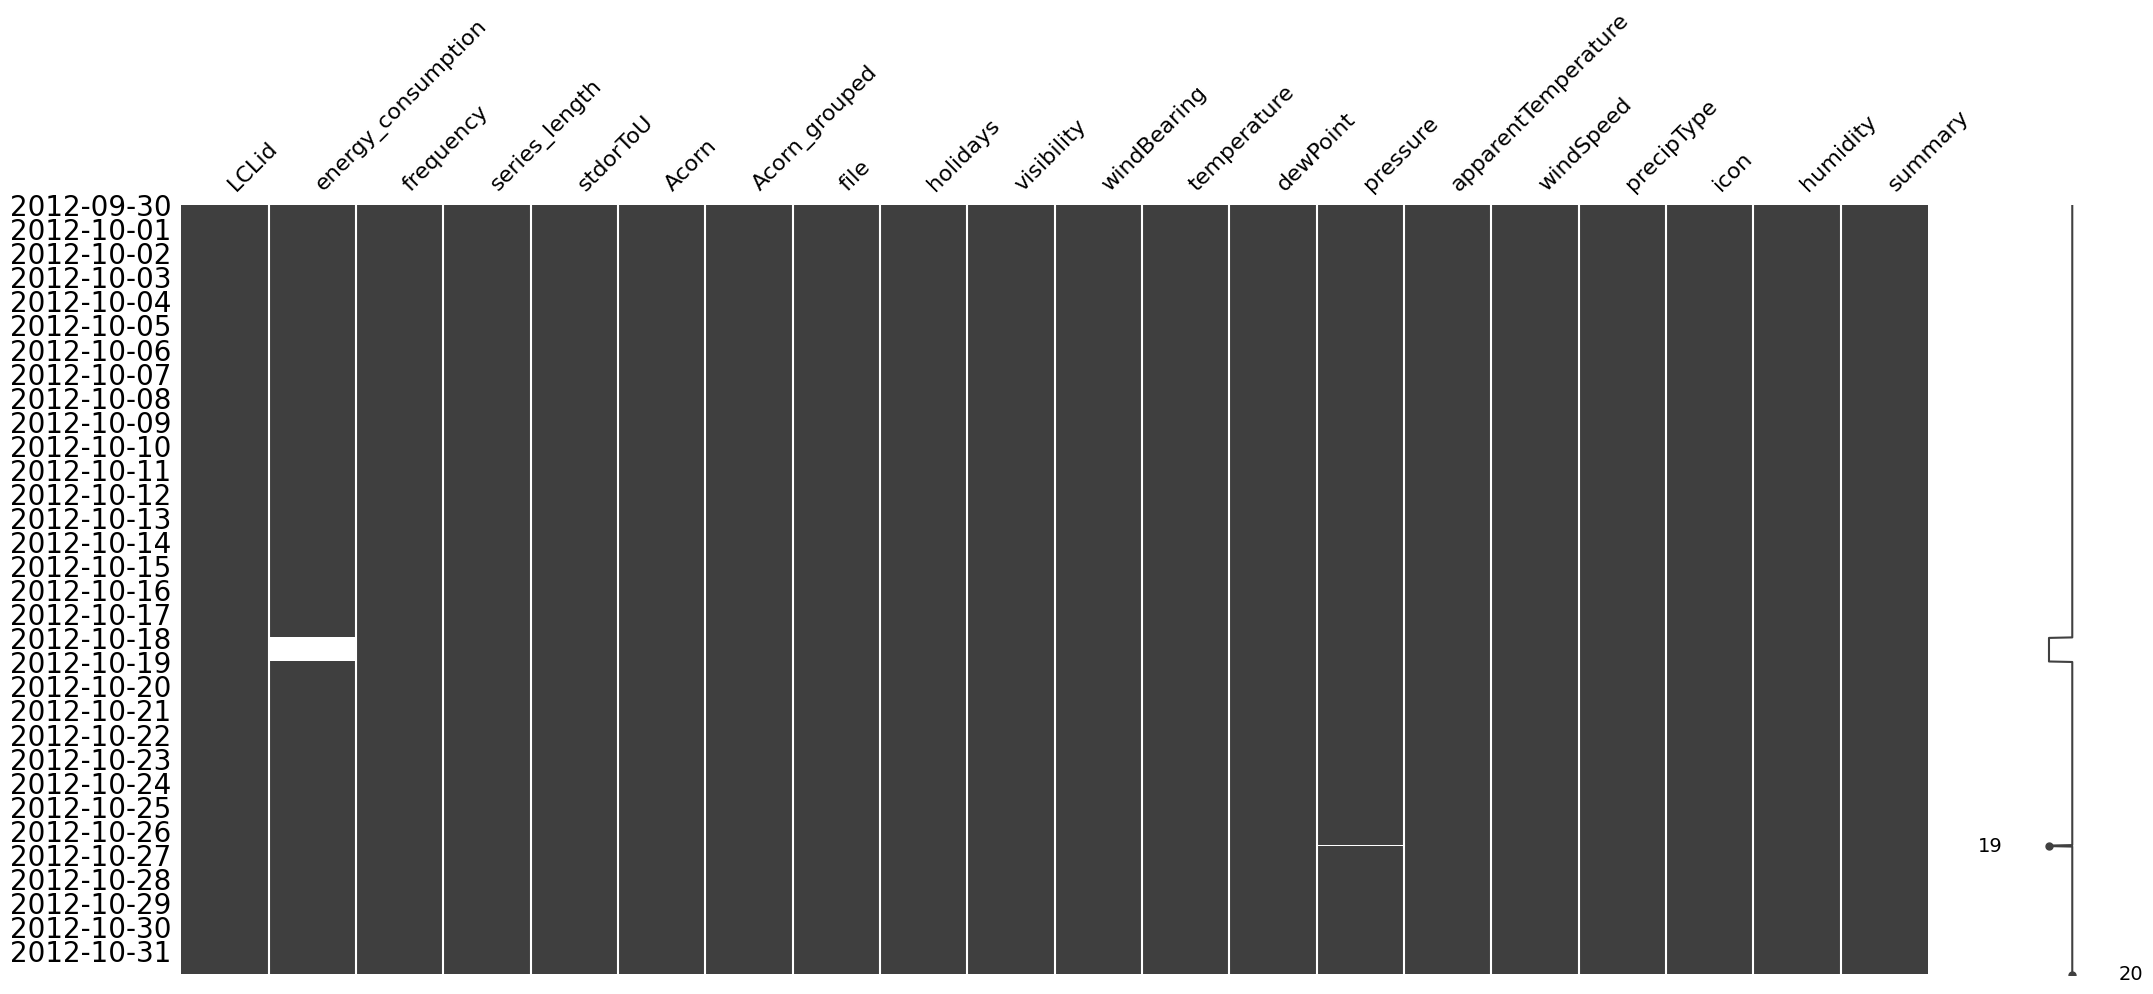

In [52]:
# take a single ts from the block
ts_df = exp_block_df[exp_block_df.LCLid=="MAC000193"].set_index('timestamp')
msno.matrix(ts_df['2012-09-30':'2012-10-31'], freq='D')

# easy to spot that the missing data is for energy_consumption between 2012-10-18 and 2012-10-19

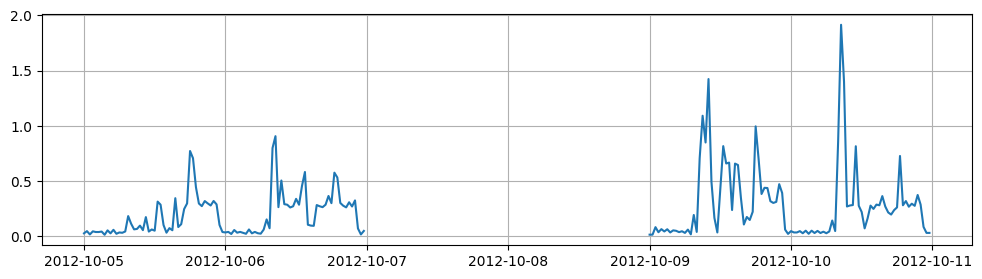

In [53]:
# artificial missing data
# the dates between which we are nulling out the time series
window = slice('2012-10-07','2012-10-08')
# create a new column and artificially create missing values for window time
ts_df['energy_consumption_missing'] = ts_df.energy_consumption
ts_df.loc[window, 'energy_consumption_missing'] = np.nan
# visualize
plt.figure(figsize=(12, 3))
plt.plot(ts_df['2012-10-05':'2012-10-10'].index, ts_df['2012-10-05':'2012-10-10']['energy_consumption_missing'])
plt.grid(True)

In [54]:
null_mask = ts_df.energy_consumption_missing.isnull()

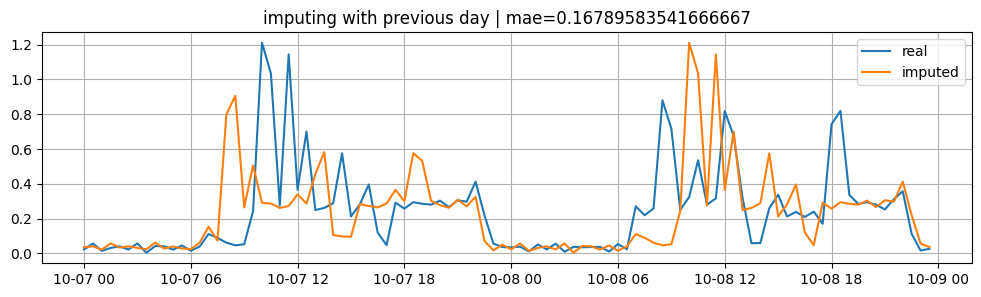

In [ ]:
# [previous day] impute with the previous day

# shift 48 steps to get previous day
# => the energy reading at 10:00 on 10-07 can be filled with the energy reading at 10:00 on 10-06 (48 steps*30-min/step = 24-hour)
ts_df['prev_day'] = ts_df['energy_consumption'].shift(48)   # real reading

# use the shifted column to fill missing
ts_df['prev_day_imputed'] = ts_df['energy_consumption_missing']
ts_df.loc[null_mask, 'prev_day_imputed'] = ts_df.loc[null_mask, 'prev_day']

# measure difference (imputed vs. real)
mae = mean_absolute_error(ts_df.loc[window, 'prev_day_imputed'], ts_df.loc[window, 'energy_consumption'])

# visualize: imputed vs. real
plot_df = ts_df.loc[window][['energy_consumption','prev_day_imputed']]
plt.figure(figsize=(12, 3))
plt.plot(plot_df.index, plot_df['energy_consumption'], label='real')
plt.plot(plot_df.index, plot_df['prev_day_imputed'], label='imputed')
plt.grid(True)
plt.title(f'imputing with previous day | mae={mae}')
plt.legend()

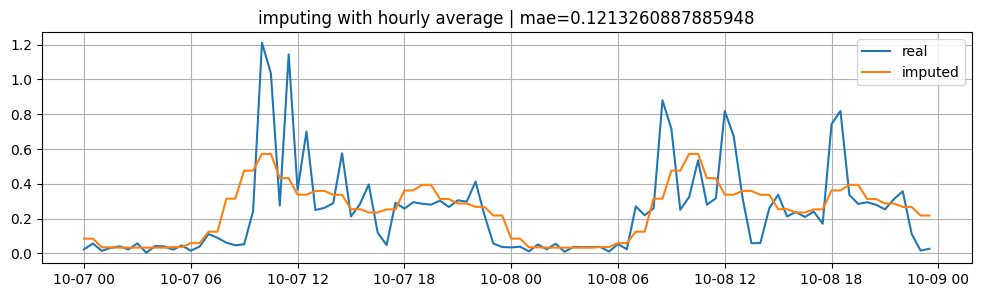

In [ ]:
# [hourly average] use hourly average to fill the missing data

# create a column with the hour from timestep
ts_df['hour'] = ts_df.index.hour

# calculate hourly average consumption
hourly_profile = ts_df.groupby(['hour'])['energy_consumption'].mean().reset_index()
hourly_profile.rename(columns={'energy_consumption':'hourly_profile'}, inplace=True)

# merge the hourly average with ts_df
idx = ts_df.index
ts_df = ts_df.merge(hourly_profile, on=['hour'], how='left', validate='many_to_one')
ts_df.index = idx

# use hourly average to fill the missing
ts_df['hourly_profile_imputed'] = ts_df['energy_consumption_missing']
ts_df.loc[null_mask, 'hourly_profile_imputed'] = ts_df.loc[null_mask, 'hourly_profile']

# calculate difference (imputed vs. real)
mae = mean_absolute_error(ts_df.loc[window, 'hourly_profile_imputed'], ts_df.loc[window, 'energy_consumption'])

# visualize: imputed vs. real
plot_df = ts_df.loc[window][['energy_consumption','hourly_profile_imputed']]
plt.figure(figsize=(12, 3))
plt.plot(plot_df.index, plot_df['energy_consumption'], label='real')
plt.plot(plot_df.index, plot_df['hourly_profile_imputed'], label='imputed')
plt.grid(True)
plt.title(f'imputing with hourly average | mae={mae}')
plt.legend()

# more generalized curve with less spikes and lower mae

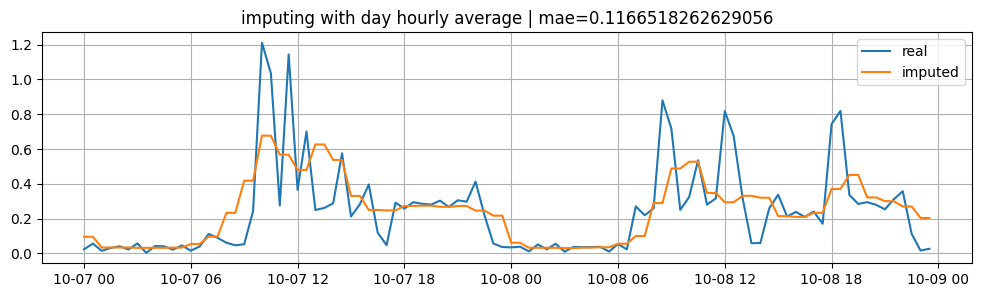

In [ ]:
# [hourly average for each weekday] calculate the average hourly consumption for each weekday seperately 
# (given usage pattern on weekday should not be same with weekend)

# create column weekday derived from timestamp
ts_df['weekday'] = ts_df.index.weekday

# calculate weekday hourly average consumption
day_hourly_profile = ts_df.groupby(['weekday','hour'])['energy_consumption'].mean().reset_index()
day_hourly_profile.rename(columns={'energy_consumption': 'day_hourly_profile'}, inplace=True)

# merge day-hourly profile with ts_df
idx = ts_df.index
ts_df = ts_df.merge(day_hourly_profile, on=['weekday','hour'], how='left', validate='many_to_one')
ts_df.index = idx

# use day-hourly profile to fill missing
ts_df['day_hourly_profile_imputed'] = ts_df['energy_consumption_missing']
ts_df.loc[null_mask, 'day_hourly_profile_imputed'] = ts_df.loc[null_mask, 'day_hourly_profile']

# calculate difference (imputed vs. real)
mae = mean_absolute_error(ts_df.loc[window, 'day_hourly_profile_imputed'], ts_df.loc[window, 'energy_consumption'])

# visualize: imputed vs. real
plot_df = ts_df.loc[window][['energy_consumption','day_hourly_profile_imputed']]
plt.figure(figsize=(12, 3))
plt.plot(plot_df.index, plot_df['energy_consumption'], label='real')
plt.plot(plot_df.index, plot_df['day_hourly_profile_imputed'], label='imputed')
plt.grid(True)
plt.title(f'imputing with day hourly average | mae={mae}')
plt.legend()

# mae further decreased to 0.117

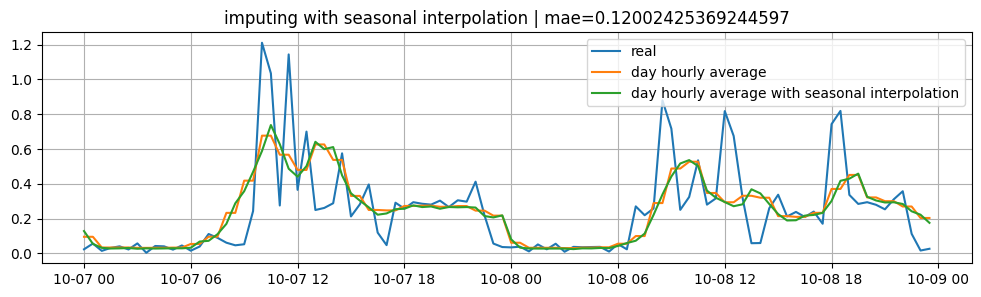

In [ ]:
# seasonal interpolation

from src.imputation.interpolation import SeasonalInterpolation

recovered_matrix_seas_interp_weekday_half_hour = \
    SeasonalInterpolation(seasonal_period=48*7,     # look for patterns that repeat every 48*7 timesteps/datapoints 
                                                    # in our case, 48*7 steps *30min/step = 7 days (i.e. day hourly profile)
                          decomposition_strategy='additive',    # substract seasonal profile 
                          interpolation_strategy='spline',      # and apply interpolation technique below (to capture the trend)
                          interpolation_args={"order":3}, 
                          min_value=0).fit_transform(ts_df.energy_consumption_missing.values.reshape(-1, 1))


ts_df['seas_interp_weekday_half_hour_imputed'] = recovered_matrix_seas_interp_weekday_half_hour

# calculate difference (imputed vs. real)
mae = mean_absolute_error(ts_df.loc[window, 'seas_interp_weekday_half_hour_imputed'], ts_df.loc[window, 'energy_consumption'])

# visualize: imputed vs. real
plot_df = ts_df.loc[window][['energy_consumption','day_hourly_profile_imputed','seas_interp_weekday_half_hour_imputed']]
plt.figure(figsize=(12, 3))
plt.plot(plot_df.index, plot_df['energy_consumption'], label='real')
plt.plot(plot_df.index, plot_df['day_hourly_profile_imputed'], label='day hourly average')
plt.plot(plot_df.index, plot_df['seas_interp_weekday_half_hour_imputed'], label='day hourly average with seasonal interpolation')
plt.grid(True)
plt.title(f'imputing with seasonal interpolation | mae={mae}')
plt.legend()

# both captured seasonality patterns, but the day hourly average captured the peaks of the first day better
# there's no improvement (mae of 0.120 with seasonal interpolation vs 0.117 without interpolation) for day hourly average
#       because there are no strong increasing or decreasing patterns in ts